In [139]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pprint
import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('diabetes_dataset.csv')

In [141]:
# Display the first few rows of the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [142]:
# Get a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [143]:
# Get statistical summary of the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [144]:
# Check for missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [145]:
# Check data types of each column

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

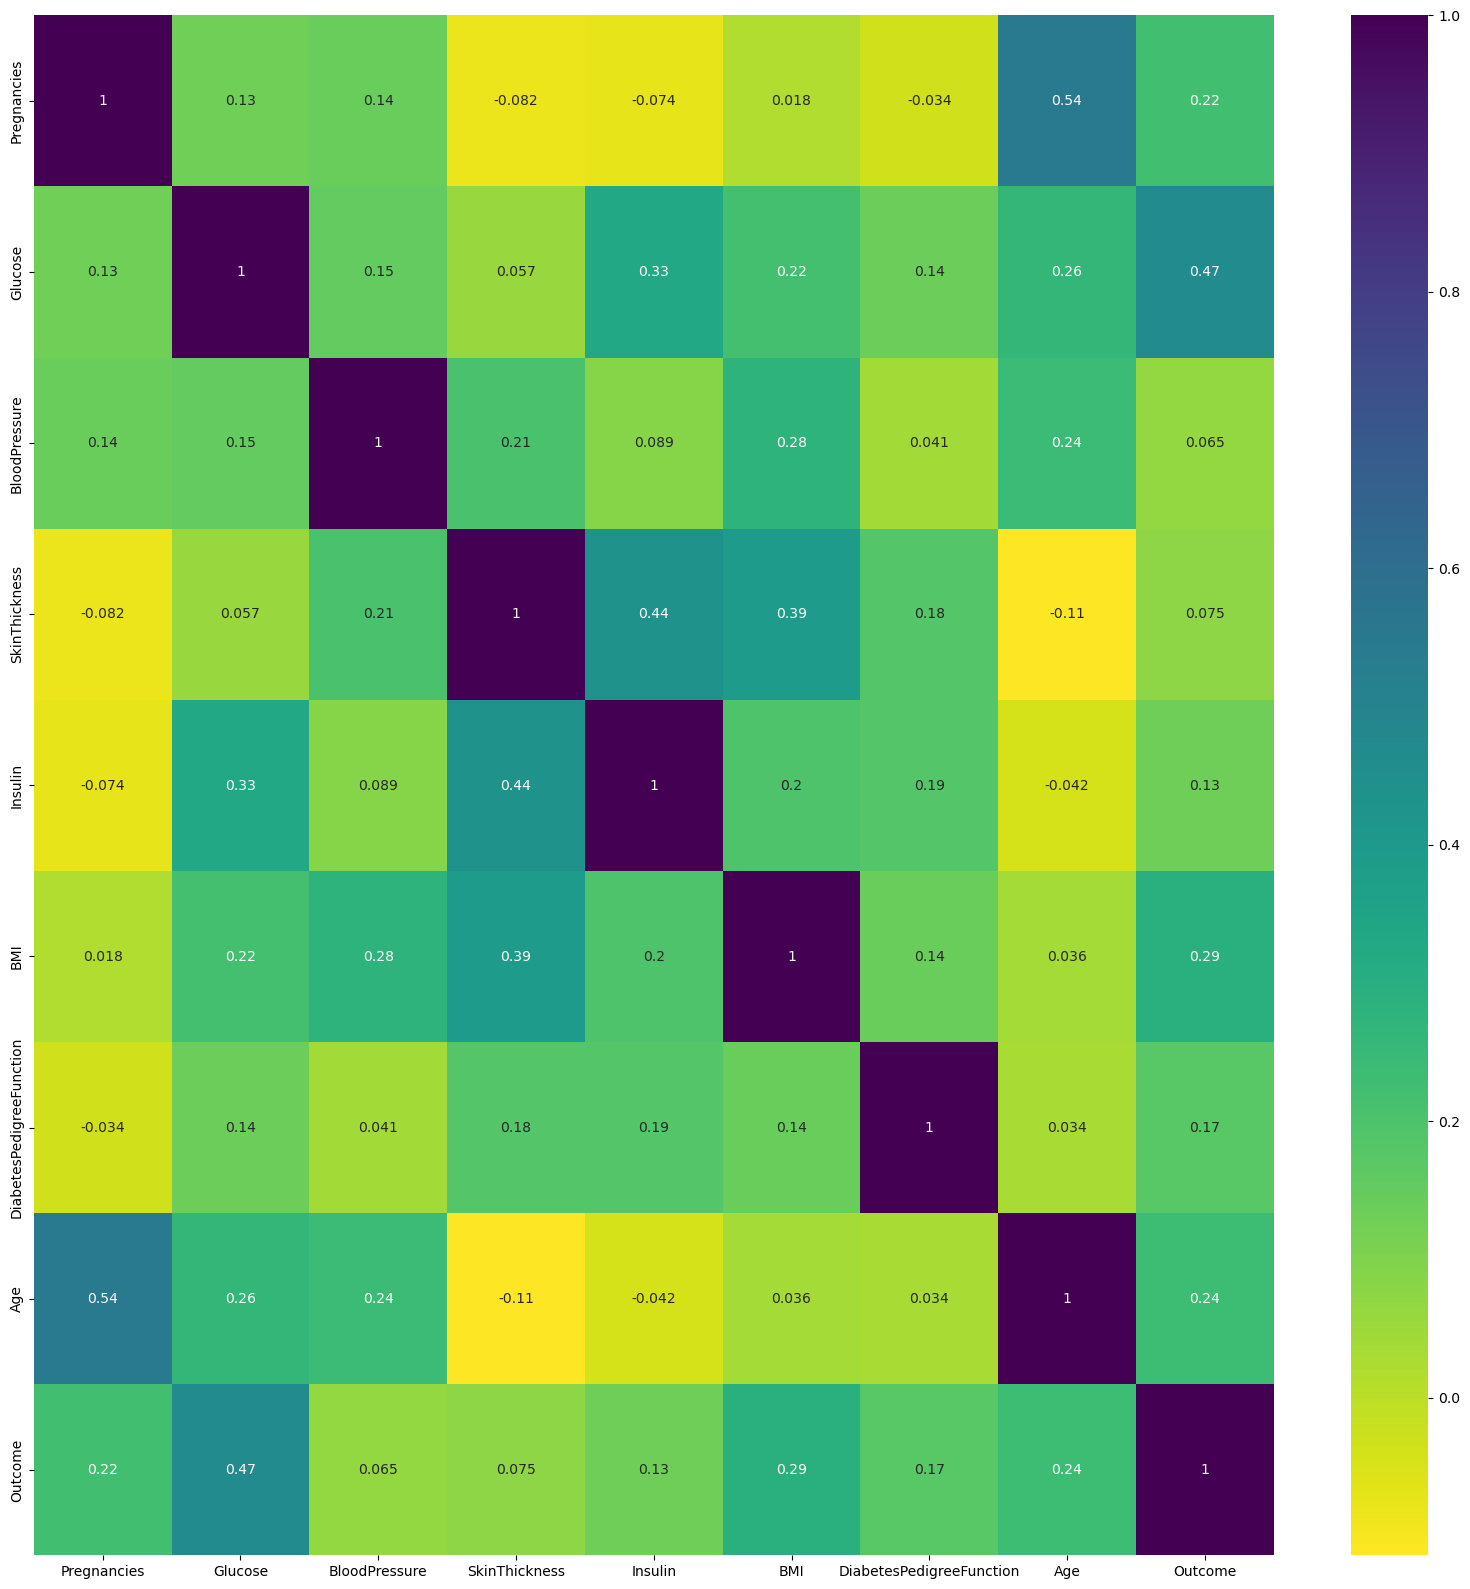

In [146]:
corr = df.corr()  # Compute correlation matrix
plt.figure(figsize = (20,20))

# heatmap 
sns.heatmap(corr , cmap='viridis_r' , annot=True)

plt.show()

Feature Selection

In [147]:
cor_target = abs(corr['Outcome'])

relevant_features = cor_target[cor_target > 0.25]

names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove("Outcome")

pprint.pprint(names)

['Glucose', 'BMI']


Split features and target

In [148]:
X = df.drop("Outcome", axis=1) # all columns except Subscription
y = df["Outcome"] # only Subscription column

Train-test split

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42, stratify = y
)

Scale features

In [150]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create and train logistic regression model

In [151]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Make predictions

In [152]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [153]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

# Balanced accuracy
bal_acc = balanced_accuracy_score(y_test, y_pred)

# Precision and Recall
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", bal_acc)
print("Precision:", prec)
print("Recall:", rec)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.734375
Balanced Accuracy: 0.6851940298507462
Precision: 0.6481481481481481
Recall: 0.5223880597014925

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.65      0.52      0.58        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



Confusion Matrix:
 [[106  19]
 [ 32  35]]


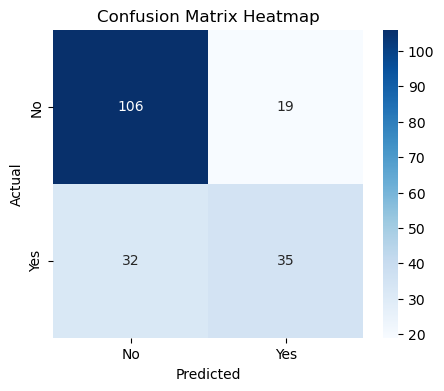

In [155]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

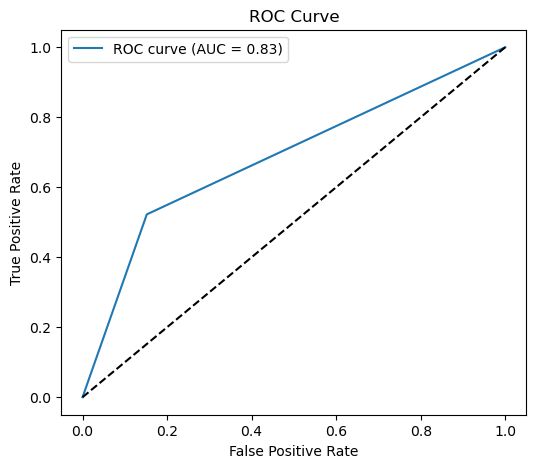

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0,1], [0,1], "k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [157]:
# Check learned coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nModel Coefficients:\n", coeff_df)


Model Coefficients:
                     Feature  Coefficient
1                   Glucose     1.111573
5                       BMI     0.727884
0               Pregnancies     0.430638
6  DiabetesPedigreeFunction     0.237857
7                       Age     0.154219
3             SkinThickness    -0.007689
4                   Insulin    -0.079121
2             BloodPressure    -0.204350
